In [1]:
# import the data set
from sklearn.datasets import load_breast_cancer
# import train_test_split function to separate train and test data
from sklearn.model_selection import train_test_split
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# import plot_tree for visualizing the tree
from sklearn.tree import plot_tree
# import metrics for accuracy calculation
from sklearn import metrics

In [2]:
#a. load the Breast cancer data
data = load_breast_cancer()

#b. print out the names of the features(X)
featureNames = data.feature_names
print("Names of the features (X):", ", ". join(featureNames))

print()
# print out the name of the target (y)
targetNames = data.target_names
print("Names of the target (y):", ", ".join(targetNames))

Names of the features (X): mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension

Names of the target (y): malignant, benign


In [3]:
#c. allocate the half of the data to Train(X_train, y_train)
#and the remaining half to Test(X_test, y_test)
features = data.data #numpy 2D
target = data.target #numpy

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, train_size = 0.5)

In [4]:
#d. Goal: predict target using features
#e. Use Train set to train and Test set to test
#f. Use the Gini index as the criterion and 
#fix the maximum depth of trees as 2
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

In [5]:
#g. Generate a decision tree from X train, y train
dtc = dtc.fit(X_train, y_train)

In [6]:
#predict y_ypred from X_test
y_pred = dtc.predict(X_test)

In [7]:
#compute accuracy of the classifier by comparing y_pred and y_test
#print out the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9263157894736842


[Text(167.4, 181.2, 'worst concave points <= 0.142\ngini = 0.476\nsamples = 284\nvalue = [111, 173]'),
 Text(83.7, 108.72, 'worst perimeter <= 128.05\ngini = 0.142\nsamples = 182\nvalue = [14, 168]'),
 Text(41.85, 36.23999999999998, 'gini = 0.087\nsamples = 176\nvalue = [8, 168]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(251.10000000000002, 108.72, 'concavity error <= 0.127\ngini = 0.093\nsamples = 102\nvalue = [97, 5]'),
 Text(209.25, 36.23999999999998, 'gini = 0.058\nsamples = 100\nvalue = [97, 3]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

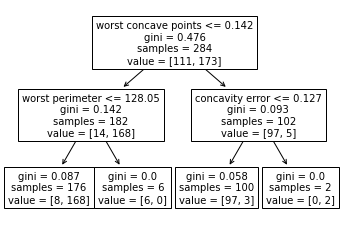

In [8]:
#h. Visualize the tree using sklearn.tree.plot_tree
#each node of trees should include feature name
plot_tree(dtc, feature_names = featureNames, fontsize = 10)

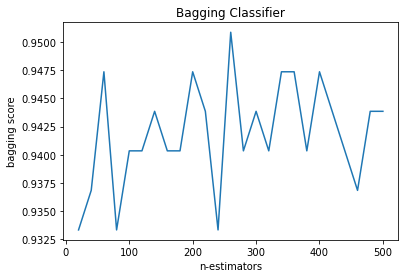

In [9]:
#i. generates multiple decision trees using the bagging
# import bagging classifier
from sklearn.ensemble import BaggingClassifier
# import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# X-axis is n estimators and Y-axis bagging score
nEstimators = []
baggingScore = []

# more than 20 data points
for i in range(25):
    # varying the parameter n estimators
    nEstimator = 20 * (i + 1)
    nEstimators.append(nEstimator)
    
    # fit the bagging classifier
    bagging = BaggingClassifier(n_estimators = nEstimator)
    bagging = bagging.fit(X_train, y_train)
    
    # determine if our model is overfitting
    # record its prediction accuracy
    accuracy = bagging.score(X_test, y_test)
    baggingScore.append(accuracy)

# draw a 2D line plot
plt.plot(nEstimators, baggingScore)
plt.xlabel("n-estimators")
plt.ylabel("bagging score")
plt.title("Bagging Classifier")
plt.show()

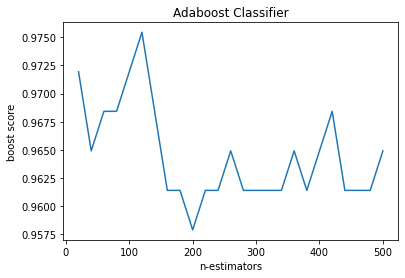

In [10]:
#j. generates multiple decision trees using the AdaBoost
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# X-axis is n estimators and Y-axis boost score
nEstimators = []
boostScore = []

# more than 20 data points
for i in range(25):
    # varying the parameter n estimators
    nEstimator = 20 * (i + 1)
    nEstimators.append(nEstimator)
    
    #fit the adaboost
    adaboost = AdaBoostClassifier(n_estimators = nEstimator)
    adaboost = adaboost.fit(X_train, y_train)
    
    # determine if our model is overfitting
    # record its prediction accuracy
    accuracy = adaboost.score(X_test, y_test)
    boostScore.append(accuracy)

# draw a 2D line plot
plt.plot(nEstimators, boostScore)
plt.xlabel("n-estimators")
plt.ylabel("boost score")
plt.title("Adaboost Classifier")
plt.show()

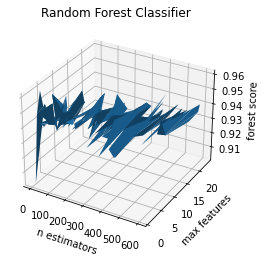

In [13]:
#generates multiple decision trees using the random forest
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#for random num of features
import random
# for square root
import math
# for plotting
import numpy as np
# X-axis is n estimators, Y-axis max features, and Z-axis forest score
nEstimators = []
maxFeatures = []
forestScore = []

# more than 100 data points
for i in range(150):
    # varying the parameter n estimators
    nEstimator = 4 * (i + 1)
    nEstimators.append(nEstimator)
    
    # varying the parameter maxFeatures
    maxFeature = random.randint(1, int(math.sqrt(nEstimator)))
    maxFeatures.append(maxFeature)
    
    rfc = RandomForestClassifier(n_estimators = nEstimator, max_features = maxFeature)
    rfc = rfc.fit(X_train, y_train)
    
    # determine if our model is overfitting
    # record its prediction accuracy
    accuracy = rfc.score(X_test, y_test)
    forestScore.append(accuracy)

#reshape the array
x = np.reshape(nEstimators, (50, 3))
y = np.reshape(maxFeatures, (50, 3))
z = np.reshape(forestScore, (50, 3))

# draw a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z)

ax.set_xlabel("n estimators")
ax.set_ylabel("max features")
ax.set_zlabel("forest score")
ax.set_title("Random Forest Classifier")
plt.show()